In [43]:
#necessary for data analysis and calculationsv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Task 11. Finds and removes outliers in residual sugar
#The dataset is loaded from the data folder. 
# head() shows the first 5 rows to get an overview!
df = pd.read_csv('../red_white_wine_cleaned.csv')
df.head()

,Unnamed: 0,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,wine_type
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red


In [ ]:
#cvalculates outlier limits for residual_sugar
# quartile are used to find the Inerterquartile Range (IQR), which is the difference between the 75th and 25th percentiles
Q1 = df['residual_sugar'].quantile(0.25)
Q3 = df['residual_sugar'].quantile(0.75)
IQR = Q3 - Q1



In [ ]:
#outliers are vaulues that fall outside the interval:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [ ]:
#finds outliers in residual_sugar
#and then creates a new DataFrame that only contains the rows where residual_sugar that is outside the calculated limits
outliers = df[(df['residual_sugar'] < lower_bound) | (df['residual_sugar'] > upper_bound)]
outliers


,Unnamed: 0,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,wine_type
1357,1357,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.80,6,white
1367,1367,8.3,0.420,0.62,19.25,0.040,41.0,172.0,1.00020,2.98,0.67,9.70,5,white
1390,1390,7.3,0.240,0.39,17.95,0.057,45.0,149.0,0.99990,3.21,0.36,8.60,5,white
1445,1445,7.5,0.305,0.40,18.90,0.059,44.0,170.0,1.00000,2.99,0.46,9.00,5,white
1447,1447,7.1,0.230,0.35,16.50,0.040,60.0,171.0,0.99900,3.16,0.59,9.10,6,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4975,4975,6.6,0.540,0.21,16.30,0.055,41.0,182.0,0.99860,3.35,0.54,10.40,6,white
5141,5141,6.9,0.190,0.31,19.25,0.043,38.0,167.0,0.99954,2.93,0.52,9.10,7,white
5187,5187,6.1,0.340,0.24,18.35,0.050,33.0,184.0,0.99943,3.12,0.61,9.30,5,white
5188,5188,6.2,0.350,0.25,18.40,0.051,28.0,182.0,0.99946,3.13,0.62,9.30,6,white


In [ ]:
#remove outliers from the dataset
#the dataset is filtered so that only the rows within the normal range are kept
df = df[(df['residual_sugar'] >= lower_bound) & (df['residual_sugar'] <= upper_bound)]


In [ ]:
#confirmation: residual_sugar without outliers
#this method shows statistics like min, max, and mean to check if the limits now look normal.
df['residual_sugar'].describe()

count    5177.000000
mean        4.680925
std         3.900345
min         0.600000
25%         1.700000
50%         2.600000
75%         7.050000
max        16.050000
Name: residual_sugar, dtype: float64

In [ ]:
# Task 12: The goal is to find and remove:
# attributes that do not relate to quality (low correlation), and
# attributes that are too strongly related to each other high internal correlation → multicollinearity

# ffirst we calculate the correlation with quality.
# The line shows how strongly each numerical column is related to quality.
# High values (above 0.1 or below -0.1) suggest relevance. → we then remove the columns that are not relevant.
correlations = df.corr(numeric_only=True)['quality'].sort_values(ascending=False)
print(correlations)

quality                 1.000000
alcohol                 0.469019
Unnamed: 0              0.115360
citric_acid             0.096833
free_sulfur_dioxide     0.053806
sulphates               0.041979
ph                      0.040450
total_sulfur_dioxide   -0.051641
residual_sugar         -0.057228
fixed_acidity          -0.080392
chlorides              -0.202116
volatile_acidity       -0.265167
density                -0.326324
Name: quality, dtype: float64


In [ ]:
#removes columns with low correlation to quality
df = df.drop(columns=['residual_sugar', 'density'])


In [ ]:
#now we create a correlation matrix to find high correlations, typically above 0.8
#if two features are highly correlated, one of them will vbe removed.
corr_matrix = df.corr(numeric_only=True)
print(corr_matrix)

                      Unnamed: 0  fixed_acidity  volatile_acidity  \
Unnamed: 0              1.000000      -0.480289         -0.484105   
fixed_acidity          -0.480289       1.000000          0.214817   
volatile_acidity       -0.484105       0.214817          1.000000   
citric_acid             0.063295       0.330240         -0.384391   
chlorides              -0.407697       0.288970          0.367615   
free_sulfur_dioxide     0.347047      -0.281695         -0.349014   
total_sulfur_dioxide    0.452014      -0.329111         -0.402170   
ph                     -0.279725      -0.271026          0.246641   
sulphates              -0.375272       0.304892          0.227761   
alcohol                 0.197716      -0.102909         -0.065293   
quality                 0.115360      -0.080392         -0.265167   

                      citric_acid  chlorides  free_sulfur_dioxide  \
Unnamed: 0               0.063295  -0.407697             0.347047   
fixed_acidity            0.330240

In [ ]:
# here it removes the column 'total_sulfur_dioxide' because it is highly correlated with another feature and can cause errors
df = df.drop(columns=['total_sulfur_dioxide'], errors='ignore')


In [ ]:
# Task 13 – Transform the data by applying PCA (Principal Component Analysis)
# PCA is used to reduce the number of columns, also called dimensions, in the dataset while keeping as much information as possible.
# This makes it easier to analyze and visualize.
# pip install scikit-learn -> run this in your terminal if not already installed.
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [ ]:
# Removes 'Unnamed: 0' if it exists
# it's just an index column from the CSV and has no value for the analysis, so don’t let it confuse you
df = df.drop(columns=['Unnamed: 0'], errors='ignore')


In [ ]:
# X is what we want to analyze with PCA – it’s the "input data"
# y is the value we are trying to predict or analyze, the "output"
X = df.drop(columns=['quality'])  # Everything except quality  
y = df['quality']                  # quality is our target (keep this in mind, it's used later;))


In [ ]:
 #Keeps only numerical columns which is float and int for PCA
X = df.select_dtypes(include=['float64', 'int64']).drop(columns=['quality'])
y = df['quality']

In [ ]:
#Standardization is important when working with PCA:
#we make sure that all numerical columns are on the same scale mean = 0, std = 1.
#this is super important because PCA is sensitive to different scales.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
# PCA (Principal Component Analysis) is performed
# first, we reduce it to 2 components so we can visualize it in 2D
pca = PCA(n_components=2)  
X_pca = pca.fit_transform(X_scaled)

### Then we save it as a DataFrame to make it easier to create visualizations later
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])

# Next, we add the target column back (quality)
df_pca['quality'] = y.values

# snd finally we show the first rows
df_pca.head()


,PC1,PC2,quality
0,2.474802,-2.494313,5
1,3.080101,-1.396842,5
2,2.818864,-1.366646,5
3,1.375564,2.846712,6
4,2.299855,-2.426951,5


In [45]:
# Task 14: Print out ten random rows from the final dataset as a proof of concept
# a 2D plot is used in this task to show how the wines are spread across the two new PCA dimensions (PC1 and PC2)
# then we color the points by their quality to see if there is a pattern in the quality. This gives a better overview because we can visualize it.
plt.figure(figsize=(10, 6))

# and of course, we remember to: show 10 random rows from the PCA-transformed dataset as proof of concept
df_pca.sample(10)


,PC1,PC2,quality
438,2.753215,2.296453,7
3377,-1.303415,-0.507691,5
2749,-0.297680,2.154521,6
2040,-0.869746,-0.467424,6
2438,-0.916136,0.664369,7
2842,-1.090561,-0.060186,5
1199,0.988160,-0.436926,7
3067,-0.596382,0.664037,5
1874,0.008857,0.708110,5
4880,-0.254577,-0.118121,5


<Figure size 1000x600 with 0 Axes>

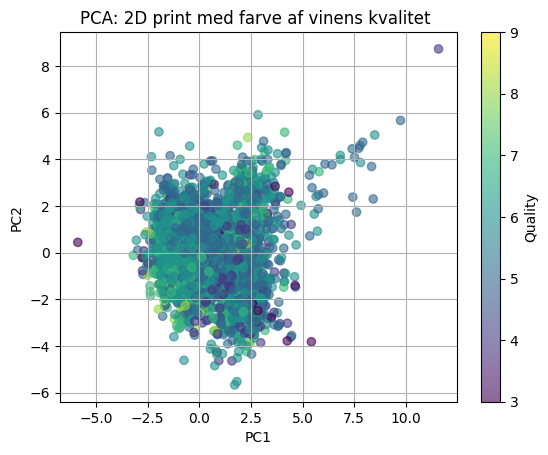

In [ ]:
# Scatter plot of PCA components that is colored by wine quality
# df_pca['PC1'] is used for the x-axis
# df_pca['PC2'] used for the y-axis
# c=df_pca['quality'] means the color of each point is based on the wine's quality
# cmap='viridis' provides a color map where lower values are purple/blue and higher values are yellow/green
# alpha=0.6 makes the points 60% transparent, so it’s easier to see overlapping points

scatter = plt.scatter(
    df_pca['PC1'], 
    df_pca['PC2'], 
    c=df_pca['quality'], 
    cmap='viridis', 
    alpha=0.6
)

# plt.xlabel('PC1') sets the name of the x-axis to "PC1", which stands for Principal Component 1
# plt.ylabel('PC2') does the same for the y-axis
# plt.title('PCA: 2D plot with color based on wine quality') adds a title so we know what the plot shows
# plt.colorbar(scatter, label='Quality') adds a color bar on the side that explains the meaning of the colors
# plt.grid(True) turns on background grid lines, which help with reading the plot
# plt.show() simply shows the plot, but it’s very important,, without this line, the plot will not be displayed

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA: 2D print med farve af vinens kvalitet ')
plt.colorbar(scatter, label='Quality')
plt.grid(True)
plt.show()
